## Information about this notebook

This example script was provided as part of the Data Management Project (INF) within the TR-172 "ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³ funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author of this notebook: Elisa F. Akansu, Leibniz-Institute for Tropospheric Research (TROPOS), Leipzig, Germany, akansu@tropos.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

This notebook is licensed under the [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

# Tethered balloon-borne profiles of turbulence properties

**Tethered balloon-borne measurements of turbulence during the MOSAiC expedition from December 2019 to May 2020**  
**Authors:** Akansu, Elisa F; Siebert, Holger; Dahlke, Sandro; Graeser, Jürgen; Jaiser, Ralf; Sommerfeld, Anja  
**Description:** A helium filled tethered balloon was operated from an ice floe next to RV Polarstern between December 2019 and May 2020 during the MOSAiC (Multidisciplinary drifting Observatory for the Study of Arctic Climate) expedition. The balloon was operated with modular instrumentation. This is a dataset of the hot-wire anemometer package providing turbulence measurements on 34 days (during polar night and spring). The dataset includes vertical profiles of wind turbulence measurements up to typically around 600 m (~200 m to ~1400 m). Further, derived energy dissipation rates of each profile are provided in a second data set.  
**Year:** 2021 and 2022  
**Institutes:** Leibniz Institute for Tropospheric Research, Leipzig, Germany; Alfred-Wegener-Institut
 Helmholtz-Zentrum für Polar- und Meeresforschung, Potsdam, Germany  

**DOI:** https://doi.org/10.1594/PANGAEA.932007 and https://doi.org/10.1594/PANGAEA.948546  
**License:** [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)


### Content of this notebook
This is an example script provided to facilitate the use of hot-wire anemometer data of a tethered-balloon system. The vertical profiles of in situ observations allow the detailed analysis of the atmospheric boundary layer. Turbulence estimates can be used to estimate the depth of the surface mixing layer (see also  Akansu, E. F., Dahlke, S., Siebert, H., and Wendisch, M.: Determining the surface mixing layer height of the Arctic atmospheric boundary layer during polar night in cloudless and cloudy conditions, EGUsphere [preprint], https://doi.org/10.5194/egusphere-2023-629, 2023.).

The data is provided as .tab files. Download and save the data in the working directory of this notebook. Here we use an example profile of the observations and derived turbulence properties measured on 23 December 2019, starting at 12:54 UTC.
The files are opend with pandas package.

In [1]:
#import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
f = open('./20191223_125408_130800_balloon_hotwire.tab')
# Skip comment /* */ for reading.
line_no = [num for num,line in enumerate(f) if '*/' in line][0] 
data = pd.read_csv('./20191223_125408_130800_balloon_hotwire.tab', skiprows=line_no+1, sep="\t", header=0,
                 engine='python', parse_dates=(['Date/Time']))
data.columns = ['date', 'PPPP', 'Altitude', 'TTT', 'T_flag', 'U']
f.close()

# interoplation of height for plotting
data = data.assign(Altitude_ipol = data.Altitude.interpolate(method="linear").fillna(method='bfill').round(1))


In [3]:
f = open('./20191223_125408_130800_energy_dissipation_rate.tab')
# Skip comment /* */ for reading.
line_no = [num for num,line in enumerate(f) if '*/' in line][0] 
data_turb = pd.read_csv('./20191223_125408_130800_energy_dissipation_rate.tab', skiprows=line_no+1, sep="\t", header=0,
                 engine='python', parse_dates=(['Date/time start', 
                                                'Date/time end']))
data_turb.columns = ['interval_start', 'interval_end','Altitude','EDR', 'alpha',
                   'Timerange']
f.close()

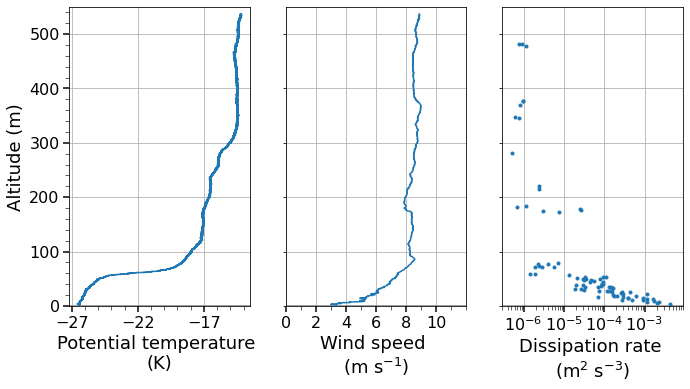

In [4]:
n = 130 # number of subplots
ymin = 0
ymax = 550
ystep= 100
fa = 16
fl = 18
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11,5.5)) 

# TEMPERATURE 
ax1 = plt.subplot(n+1)
plt.grid()
plt.axhline(y=0, linestyle='-', color='grey')
ax1.plot(data.TTT, data.Altitude_ipol)
plt.xticks(np.arange(int(data.TTT.min()-1), int(data.TTT.max()+1), 5),fontsize=fa)
ax1.xaxis.set_minor_locator(MultipleLocator(1))
plt.xlabel("Potential temperature \n(K)", fontsize=fl)
plt.ylim(ymin,ymax)
plt.yticks(np.arange(0, ymax, ystep),fontsize=fa)
plt.ylabel("Altitude (m)", fontsize=fl)
ax1.tick_params(length=4, axis='x', which='minor')
ax1.tick_params(length=6, axis='x', which='major', width=1.5)
ax1.tick_params(length=4, axis='y', which='minor')
ax1.tick_params(length=6, axis='y', which='major', width=1.5)
ax1.yaxis.set_minor_locator(MultipleLocator(20))


# WIND SPEED
ax2 = plt.subplot(n+2) 
plt.grid()
plt.axhline(y=0, linestyle='-', color='grey')

ax2.plot(data.U.rolling(window=125).mean(), data.Altitude_ipol)
plt.xlim(0, int(data.U.max()+3))
plt.xticks((np.arange(0, int(data.U.max()+3),2)), fontsize=fa)
ax2.xaxis.set_minor_locator(MultipleLocator(1))
plt.ylim(ymin, ymax)
ax2.set_yticks((np.arange(0,ymax,ystep)))
ax2.set_yticklabels([])
plt.xlabel("Wind speed \n(m s$^{-1}$)", fontsize= fl)
ax2.tick_params(length=4, axis='x', which='minor')
ax2.tick_params(length=6, axis='x', which='major', width=1.5)

# DISSIPATION RATE 
ax3 = plt.subplot(n+3) 
plt.grid()
plt.axhline(y=0, linestyle='-', color='tab:grey', alpha=0.9)

plt.semilogx(data_turb.EDR, data_turb.Altitude, '.', markersize=6)

plt.xlim(3*10**-7,9*10**-3)
plt.yticks((np.arange(0,ymax,ystep)),labels=None, visible=False)
plt.ylim(ymin, ymax)
plt.xlabel("Dissipation rate \n(m$^{2}$ s$^{-3}$)", fontsize=fl)
plt.xticks(fontsize=fa)
ax3.tick_params(length=4, axis='x', which='minor')
ax3.tick_params(length=6, axis='x', which='major', width=1.5)

plt.show()